In [33]:
import pickle 
import os
from datetime import datetime,timezone,timedelta
import pickle

import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from tqdm import tqdm
from scipy import signal

import lib_data_filter as dafi
import lib_data_process as dapr
import lib_plot
import lib_import_other_datasource as imoda

In [34]:
datekey = '0216'
ante_h = imoda.get_antenne_height(datekey)
retrack_method = 'OCES'

In [35]:
with open('../data/generated_data/270to330/timeseries_ele5_30_azi270_330_time30_all.pkl', 'rb') as f:
    ts_dict = pickle.load(f)

In [36]:
ante_h

{'1': 287.2321664504707, '2': 287.27779385913163, '2r': 287.2524313945323}

In [37]:
ts_dict['ts'].keys()

dict_keys(['0811_2', '0811_3', '0907_2', '0907_3', '1004_2', '1004_3', '1031_2', '1031_3', '1127_2', '1127_3', '0216_1', '0216_2', '0216_r'])

mean 1 = 284.18 m,mean 2 = 284.31 m
std 1 = 0.16 m, std 2 = 0.16


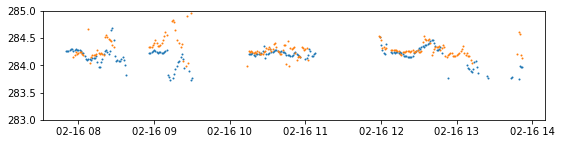

In [38]:
# from gnss-r
date_key = '0216'
ts_1 = ts_dict['ts'][f'{date_key}_1']
ts_2 = ts_dict['ts'][f'{date_key}_2']
ts_2r = ts_dict['ts'][f'{date_key}_r']


ante_h = imoda.get_antenne_height(date_key)
fig,ax = plt.subplots()
ax.scatter(list(ts_1.keys()), ante_h['1']-np.asarray(list(ts_1.values())), s=1)
ax.scatter(list(ts_2.keys()), ante_h['2']-np.asarray(list(ts_2.values()))+0.2, s=1)
ax.set_ylim([283,285])
fig.set_size_inches(9,2)

mean1 = np.nanmean(ante_h['1']-np.asarray(list(ts_1.values())))
std1 = np.nanstd(ante_h['1']-np.asarray(list(ts_1.values())))
mean2 = np.nanmean(ante_h['2']-np.asarray(list(ts_2.values()))+0.2)
std2 = np.nanstd(ante_h['2']-np.asarray(list(ts_2.values()))+0.2)
print(f'mean 1 = {round(mean1,2)} m,mean 2 = {round(mean2,2)} m')
print(f'std 1 = {round(std1,2)} m, std 2 = {round(std2,2)}')

mean = 284.34 m
std = 0.17 m


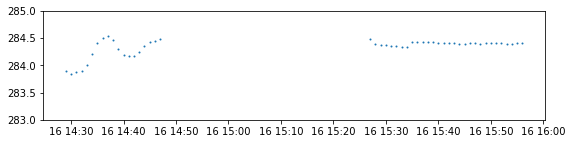

In [39]:
fig,ax = plt.subplots()
ax.scatter(list(ts_2r.keys()), ante_h['2r']-np.asarray(list(ts_2r.values())), s=1)
ax.set_ylim([283,285])
fig.set_size_inches(9,2)

mean = np.nanmean(ante_h['2r']-np.asarray(list(ts_2r.values())))
std = np.nanstd(ante_h['2r']-np.asarray(list(ts_2r.values())))
print(f'mean = {round(mean,2)} m')
print(f'std = {round(std,2)} m')

In [40]:
with open('../data/generated_data/270to330/timeseries_ele5_50_time30_rotate.pkl', 'rb') as f:
    ts_dict = pickle.load(f)


mean = 284.41 m
std = 0.03 m


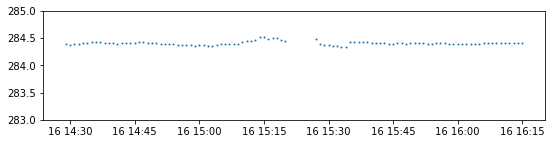

In [41]:
ts_0216_r = ts_dict['ts']['0216_r']
fig,ax = plt.subplots()
ax.scatter(list(ts_0216_r.keys()), ante_h['2r']-np.asarray(list(ts_0216_r.values())), s=1)
ax.set_ylim([283,285])

fig.set_size_inches(9,2)
mean = np.nanmean(ante_h['2r']-np.asarray(list(ts_0216_r.values())))
std = np.nanstd(ante_h['2r']-np.asarray(list(ts_0216_r.values())))
print(f'mean = {round(mean,2)} m')
print(f'std = {round(std,2)} m')